# Lab 3: Linear regression, part 3

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
#Load data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")

#Reindex and add clock speed column
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 

_2.	Split the data randomly into a training set and a test set, using a 70/30 split (70% training data).  Use train_test_split._

In [21]:
predictors = ['cach', 'chmin']

X = df[predictors].values
y=df['prp'].values

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=42)

_3.	Use LinearRegression to create a linear model to predict performance (feature ‘prp’).  Use a couple of predictor variables of your own choice.  Create the model using your training set_


In [22]:
#fit the linear model 
regr=LinearRegression()
regr.fit(X_train, y_train)

#make predictions
predicted=regr.predict(X_test)

_4.	Compute the RMSE of your model on the test data.  Do this manually._

In [23]:
rmse=np.sqrt(((y_test - predicted)**2).mean())
print(rmse)

183.3100575455339


In [24]:
# Feature engineering - Testing polynomial features (pt1), simple linear regression comparison
from sklearn.preprocessing import PolynomialFeatures

reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
rsme = np.sqrt(((predicted - y_test)**2).mean())
print('Using Simple Linear Regression: {:.2f}'.format(rsme)) 

for i in range(len(X[0])):
    print(i, ' coefficient: {:.3f}'.format(reg.coef_[i])) 

Using Simple Linear Regression: 183.31
0  coefficient: 1.206
1  coefficient: 8.009


LinearRegression()

In [31]:
# Feature engineering - Testing polynomial features (pt2), polynomial linear regression comparison
predictors = ['cach', 'chmin']
X = df[predictors].values

# Make a model of polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False) 
pf.fit(X)
# Transform X, so it now has many more features
X_poly = pf.transform(X)

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, y, test_size=0.30, random_state=42) 
reg.fit(X_train2, y_train2)

#4.	Predict prp using your test set, and write your own code to compute the RMSE. 
predicted2 = reg.predict(X_test2)
rsme2 = np.sqrt(((predicted2 - y_test2)**2).mean()) 

print('Using Polynomial Linear Regression: {:.2f}'.format(rsme2)) 

Using Polynomial Linear Regression: 167.01


Using Polynomial Linear Regression: 188.66


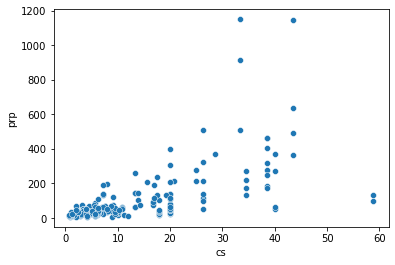

In [32]:
#5.	For each experiment, I want you to pick some features, transform them in
# some way (or not at all), and then build a linear model using the training
# data.  Write down the RMSE you get on the test data.  Note: if you transform
# ‘prp’, you will need to account for that when you compute RMSE!

sns.scatterplot(data=df, x='cs', y='prp')

df['cs_2'] = df['cs']**2

predictors = ['cs_2']
X = df[predictors].values

# Make a model of polynomial features
pf = PolynomialFeatures(degree=3, include_bias=False) 
pf.fit(X)
# Transform X, so it now has many more features
X_poly = pf.transform(X)

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, y, test_size=0.30, random_state=42) 
reg.fit(X_train2, y_train2)

predicted2 = reg.predict(X_test2)
rsme2 = np.sqrt(((predicted2 - y_test2)**2).mean()) 

print('Using Polynomial Linear Regression: {:.2f}'.format(rsme2)) 